In [2]:
import pandas as pd
import numpy as np 

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Deep Learning
import tensorflow as tf
from tensorflow import keras

# Classifiers
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score

In [3]:
data = pd.read_csv('data.csv')
data.sample(10)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
144402,144402,1.002806,-0.370511,0.604182,-0.346964,0.146476,0.100154,0.408709,-0.151980,0.624618,...,-0.214767,-0.752042,0.153928,0.039762,0.084895,0.301412,-0.254019,-0.040201,7282.52,0
115849,115849,1.123629,-0.649230,0.849409,-1.004491,-0.163479,-0.048781,0.205660,-0.147220,0.056514,...,-0.123726,-0.366760,0.148003,0.999222,0.124544,-1.249458,-0.239465,-0.074285,17418.48,0
210373,210373,-1.107289,-3.331086,-0.316905,-1.198445,-1.174074,3.221528,5.434787,-0.340746,0.155801,...,-0.473423,-0.578287,1.027127,-1.367393,1.298184,-1.010696,1.246911,-0.612477,2175.50,0
168110,168110,1.501457,-0.409717,0.277218,0.587296,0.661808,1.663190,0.265316,-0.003793,0.246505,...,-0.035083,0.785028,0.054566,-2.531844,-0.184747,0.556668,-0.190252,-0.281499,3974.86,0
339646,339646,-0.206165,0.567970,-0.888955,1.164525,-0.335406,-0.803549,-0.763311,0.200466,-1.001382,...,0.287983,-0.261116,-0.227860,-0.788360,0.257180,1.397709,1.005403,0.593000,14617.52,1
536552,536552,-0.364017,0.489825,-0.532702,0.664230,-0.290122,-0.133462,-0.537100,0.225813,-0.951502,...,0.253657,0.005219,-0.380830,-1.282212,0.388940,0.068391,1.189393,1.093389,5416.64,1
41302,41302,0.288370,-1.509257,0.739960,-0.696361,-0.171646,1.458787,0.194821,-0.028376,0.550755,...,0.064670,0.327113,-0.332942,-1.483145,-0.286924,-0.387018,-0.206058,0.138534,23741.66,0
424121,424121,0.346429,0.077199,-0.127360,0.686444,-0.087290,0.063411,-0.188560,0.011235,-0.378770,...,0.046355,-0.172644,-0.219008,0.048309,1.137535,0.322517,0.510143,0.669843,13846.17,1
414953,414953,-0.188778,0.027014,-0.360227,-0.356751,-0.106012,0.333940,1.280503,-0.163878,-0.130200,...,0.038926,0.398591,-0.166754,-1.290699,1.341450,-0.632664,0.073630,-0.192642,5889.31,1
255822,255822,1.775906,-0.469275,-0.011706,-0.197179,0.540985,0.670240,0.432057,-0.157629,0.839226,...,-0.074260,0.430933,-0.199608,-2.160966,0.729200,-0.965229,-0.217209,-0.276534,15295.07,0


In [5]:
count_class_1 = len(data[data['Class'] == 1])
print("Number of rows with Class = 1:", count_class_1)
count_class_0 = len(data[data['Class'] == 0])
print("Number of rows with Class = 0:", count_class_0)

Number of rows with Class = 1: 284315
Number of rows with Class = 0: 284315


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
X = data.drop(['id', 'Class'], axis=1)
y = data.Class

In [9]:
scaler1 = MinMaxScaler()
X_scaled_MM = scaler1.fit_transform(X)

scaler2 = StandardScaler()
X_scaled_SS = scaler2.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_MM, y, test_size=0.25, random_state=42)


In [12]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Metrics to be calculated
scoring = ['accuracy', 'precision', 'f1', 'roc_auc']

# Iterate through each model and perform cross-validation 
for name, model in models:
    results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    print("====================")
    print(f'{name}:')
    print(f"  Accuracy: {results['test_accuracy'].mean():.2f}")
    print(f"  Precision: {results['test_precision'].mean():.2f}")
    print(f"  F1 Score: {results['test_f1'].mean():.2f}")
    print(f"  ROC AUC: {results['test_roc_auc'].mean():.2f}")
    print("====================")


Logistic Regression:
  Accuracy: 0.96
  Precision: 0.98
  Recall: 0.94
  F1 Score: 0.96
  ROC AUC: 0.99
Random Forest:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00
  ROC AUC: 1.00
SVM:
  Accuracy: 0.97
  Precision: 0.99
  Recall: 0.95
  F1 Score: 0.97
  ROC AUC: 1.00
Gradient Boosting:
  Accuracy: 0.98
  Precision: 0.99
  Recall: 0.97
  F1 Score: 0.98
  ROC AUC: 1.00
Decision Tree:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00
  ROC AUC: 1.00


In [14]:
model_1 = RandomForestClassifier()

In [15]:
model_1.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
from sklearn.metrics import accuracy_score
y_pred = model_1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,2)*100)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71023
           1       1.00      1.00      1.00     71135

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



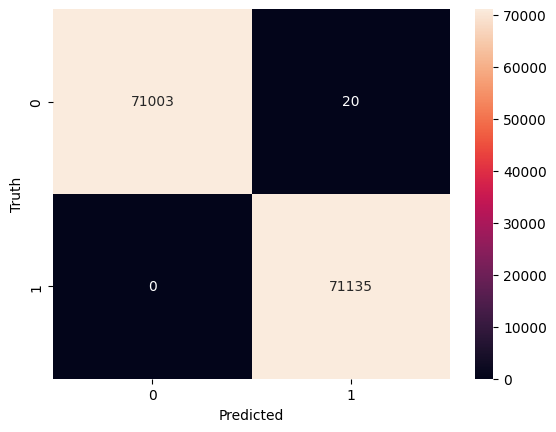

In [17]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

Principal Component 1:
  Amount: 1.000
  V1: -0.003
  V4: 0.002
  V18: -0.002
  V11: 0.002
  V17: -0.002
  V3: -0.001
  V12: -0.001
  V14: -0.001
  V9: -0.001
  V13: -0.001
  V19: 0.001
  V10: -0.000
  V16: -0.000
  V8: 0.000
  V24: -0.000
  V5: -0.000
  V2: 0.000
  V15: 0.000
  V21: 0.000
  V6: -0.000
  V23: -0.000
  V25: -0.000
  V22: -0.000
  V27: 0.000
  V26: 0.000
  V28: -0.000
  V7: -0.000
  V20: -0.000

Principal Component 2:
  V1: -0.588
  V11: 0.370
  V4: 0.369
  V17: -0.348
  V18: -0.338
  V19: 0.184
  V3: -0.165
  V12: -0.159
  V14: -0.135
  V9: -0.120
  V10: -0.090
  V8: 0.073
  V16: -0.067
  V5: -0.049
  V2: 0.048
  V6: -0.042
  V26: 0.021
  V13: 0.021
  V22: 0.021
  V7: -0.013
  V15: -0.011
  V20: 0.010
  V21: 0.009
  V27: 0.007
  Amount: -0.005
  V23: 0.003
  V24: -0.002
  V28: -0.001
  V25: -0.000



/Users/scarnogu/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Silhouette Score with PCA: 0.39


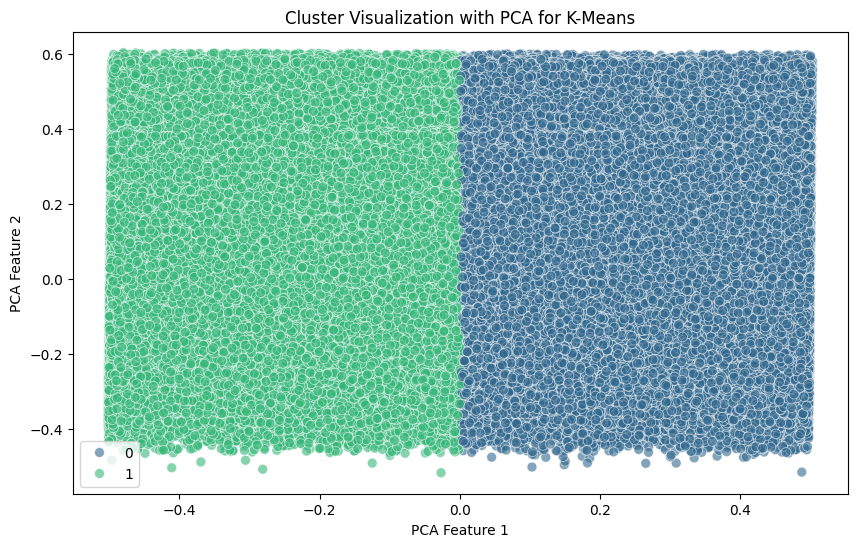

: 

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

data = pd.read_csv('data.csv')

X = data.drop(['id', 'Class'], axis=1)
y = data['Class']

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

clustering_models = [
    ('K-Means', KMeans(n_clusters=2, random_state=42)),
    ('Hierarchical', AgglomerativeClustering(n_clusters=2)),
    ('DBSCAN', DBSCAN(eps=0.5, min_samples=5))
]

# PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Analyze PCA loadings
loadings = pca.components_
feature_names = X.columns
for i, pc in enumerate(loadings):
    print(f"Principal Component {i+1}:")
    pc_loadings = {feature_names[j]: pc[j] for j in range(len(feature_names))}
    sorted_loadings = sorted(pc_loadings.items(), key=lambda x: -abs(x[1]))
    for feature, loading in sorted_loadings:
        print(f"  {feature}: {loading:.3f}")
    print()

# Cluster analysis with PCA-reduced data
for name, model in clustering_models:
    clusters = model.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, clusters)
    print(f"{name} Silhouette Score with PCA: {silhouette_avg:.2f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=50, alpha=0.6)
    plt.title(f'Cluster Visualization with PCA for {name}')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.show()
